In [4]:
#ABHAY VINOD
#CSE-A
#BL.EN.U4CSE21004
#ML LAB 02 CODE

import pandas as pd
import numpy as np

# Reading csv file into a pandas dataframe
df=pd.read_excel("C:\\Users\\user\\Downloads\\19CSE305_LabData_Set3.1.xlsx",'thyroid0387_UCI')
df

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


In [6]:

for column in df.columns:
    attribute_name = column
    attribute_data = df[column]

    # Determine the data type
    data_type = None

    # Check for nominal data (categorical data with no order)
    if attribute_data.dtype == 'object':
        data_type = 'Nominal'

    # Check for ordinal data (categorical data with a specific order)
    # You may need domain-specific knowledge to identify ordinal attributes
    # Example: if attribute_name == 'Education', you might consider it ordinal.
    
    # Check for numerical data (continuous or discrete)
    elif pd.api.types.is_numeric_dtype(attribute_data):
        data_type = 'Numerical'

    # Print the results
    print(f'Attribute: {attribute_name}, Data Type: {data_type}')

Attribute: Record ID, Data Type: Numerical
Attribute: age, Data Type: Numerical
Attribute: sex, Data Type: Nominal
Attribute: on thyroxine, Data Type: Nominal
Attribute: query on thyroxine, Data Type: Nominal
Attribute: on antithyroid medication, Data Type: Nominal
Attribute: sick, Data Type: Nominal
Attribute: pregnant, Data Type: Nominal
Attribute: thyroid surgery, Data Type: Nominal
Attribute: I131 treatment, Data Type: Nominal
Attribute: query hypothyroid, Data Type: Nominal
Attribute: query hyperthyroid, Data Type: Nominal
Attribute: lithium, Data Type: Nominal
Attribute: goitre, Data Type: Nominal
Attribute: tumor, Data Type: Nominal
Attribute: hypopituitary, Data Type: Nominal
Attribute: psych, Data Type: Nominal
Attribute: TSH measured, Data Type: Nominal
Attribute: TSH, Data Type: Nominal
Attribute: T3 measured, Data Type: Nominal
Attribute: T3, Data Type: Nominal
Attribute: TT4 measured, Data Type: Nominal
Attribute: TT4, Data Type: Nominal
Attribute: T4U measured, Data Type:

In [23]:
missing_values = df.isnull().sum()
print(df.isnull().sum())

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({
    
    'Missing Percentage (%)': missing_percentage
})

# Print or display the missing data summary
print(missing_data)

Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64
                          

In [25]:
# Study the data range for numeric variables.
numeric_columns = df.select_dtypes(include=['int64', 'float64'])


for column in numeric_columns.columns:
    min_value = numeric_columns[column].min()
    max_value = numeric_columns[column].max()
    print(f"{column}: Min = {min_value}, Max = {max_value}")

Record ID: Min = 840801013, Max = 841031032
age: Min = 1, Max = 97


Outliers in Record ID:
Series([], Name: Record ID, dtype: int64)


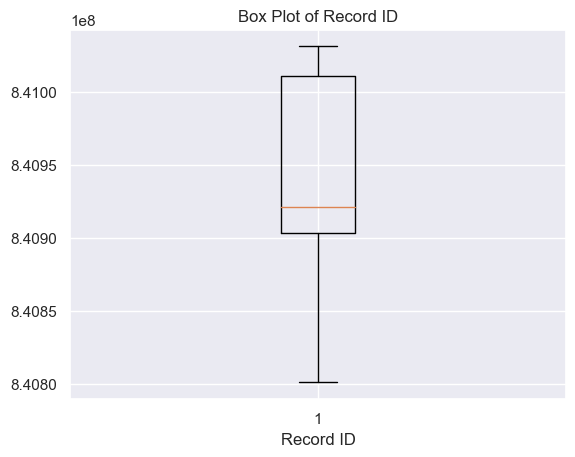

Outliers in age:
Series([], Name: age, dtype: int64)


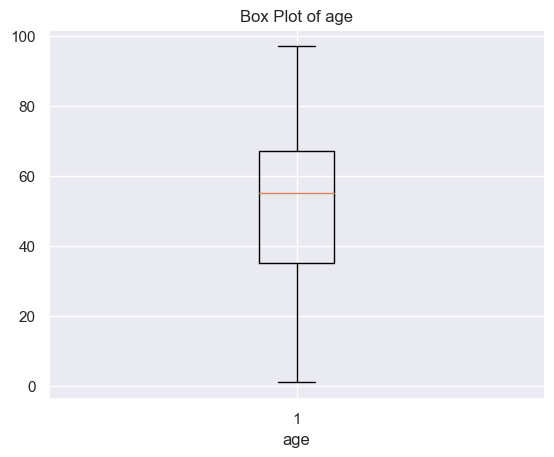

In [30]:
# Study presence of outliers in data. import matplotlib.pyplot as plt
from scipy import stats
numeric_columns = ['Record ID', 'age']  
for numeric_variable in numeric_columns:
    z_scores = stats.zscore(df[numeric_variable])
    abs_z_scores = abs(z_scores)

    
    threshold = 3

   
    outliers = (abs_z_scores > threshold)
    outlier_values = df[numeric_variable][outliers]
    print(f"Outliers in {numeric_variable}:")
    print(outlier_values)

   
    plt.boxplot(df[numeric_variable])
    plt.xlabel(numeric_variable)
    plt.title(f'Box Plot of {numeric_variable}')
    plt.show()

In [32]:
# For numeric variables, calculate the mean and variance (or standard deviation).

numeric_variables = ['Record ID', 'age'] 

for variable in numeric_variables:
    
    mean = df[variable].mean()
    
    
    variance = df[variable].var()
    
    
    std_deviation = df[variable].std()
    
   
    print(f"{variable}:")
    print(f"  Mean: {mean}")
    print(f"  Variance: {variance}")
    print(f"  Standard Deviation: {std_deviation}\n")

Record ID:
  Mean: 840934027.976
  Variance: 5819758750.219651
  Standard Deviation: 76287.34331604195

age:
  Mean: 51.509
  Variance: 352.5584774774786
  Standard Deviation: 18.776540615285835



In [35]:
# A2. Data Imputation: employ appropriate central tendencies to fill the missing values in the data 
# variables. Employ following guidance.
# • Mean may be used when the attribute is numeric with no outliers
# • Median may be employed for attributes which are numeric and contain outliers
# • Mode may be employed for categorical attributes
missing_values = df.isna()
numeric_with_outliers = ['Record ID', 'age'] 
numeric_no_outliers = ['Record ID', 'age'] 
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_column_names = categorical_columns.columns.tolist()
print("Categorical Columns:")
print(categorical_column_names)
categorical_attributes = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']  
for attribute in numeric_no_outliers:
    mean = df[attribute].mean()
    df[attribute].fillna(mean, inplace=True)

for attribute in numeric_with_outliers:
    median = df[attribute].median()
    df[attribute].fillna(median, inplace=True)

for attribute in categorical_attributes:
    mode = df[attribute].mode().iloc[0]
    df[attribute].fillna(mode, inplace=True)


remaining_missing = df.isna().sum()
print("Remaining Missing Values:")
print(remaining_missing)

Categorical Columns:
['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']
Remaining Missing Values:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured               

In [38]:
# A3. Data Normalization / Scaling: from the data study, identify the attributes which may need 
# normalization. Employ appropriate normalization techniques to create normalized set of data
from sklearn.preprocessing import MinMaxScaler
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
df[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])
print("Normalized Dataset:")
print(df.head())

Normalized Dataset:
   Record ID       age sex on thyroxine query on thyroxine  \
0   0.000000  0.291667   F            f                  f   
1   0.000004  0.291667   F            f                  f   
2   0.000126  0.416667   F            f                  f   
3   0.008838  0.364583   F            f                  f   
4   0.008843  0.322917   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?          

In [40]:
# A4. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
# attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
# the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
# Use first vector for each document for this. Compare the values for JC and SMC and judge the 
# appropriateness of each of them.
# JC = (f11) / (f01+ f10+ f11)
# SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
# f11= number of attributes where the attribute carries value of 1 in both 
# the vectors.

binary_attributes = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_attributes.append(column)


print("Binary Attributes:")
print(binary_attributes)
vector1 = df.iloc[0][binary_attributes].tolist()
vector2 = df.iloc[1][binary_attributes].tolist()

f11 = sum(x & y for x, y in zip(vector1, vector2))
f01 = sum(1 for x, y in zip(vector1, vector2) if x == 0 and y == 1)
f10 = sum(1 for x, y in zip(vector1, vector2) if x == 1 and y == 0)

if f01 + f10 + f11 == 0:
    jc = 0.0
else:
    jc = f11 / (f01 + f10 + f11)

smc_denominator = len(binary_attributes)
if smc_denominator == 0:
    smc = 0.0
else:
    smc = (f11 + sum(1 for x, y in zip(vector1, vector2) if x == y)) / smc_denominator


print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)

Binary Attributes:
[]
Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.0


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
feature_columns = df.columns[:-1]

df_encoded = pd.get_dummies(df, columns=feature_columns, drop_first=True)
vector1 = df_encoded.iloc[0, 1:].values  
vector2 = df_encoded.iloc[1, 1:].values  
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)

cosine_sim = cosine_similarity(vector1, vector2)

print("Cosine Similarity:", cosine_sim[0, 0])


Cosine Similarity: 0.5853694070049635


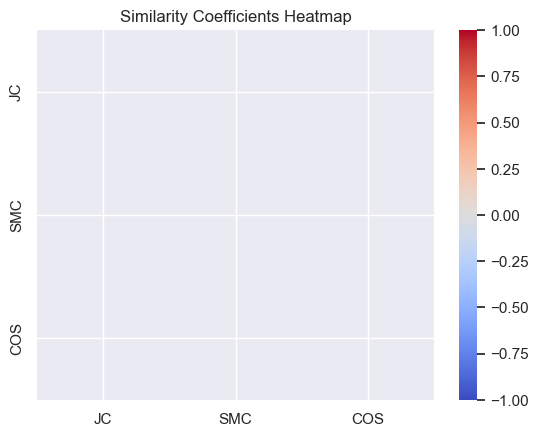

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming you have a DataFrame named 'data'
# Select the first 20 observation vectors
first_20_vectors = df.iloc[:20, 1:]  # Assuming the first column is an identifier, adjust if needed

# Replace non-binary values with NaN
non_binary_values = {'T', 'F'}  # Define the set of non-binary values in your data
first_20_vectors = first_20_vectors.applymap(lambda x: x if x in non_binary_values else np.nan)

# Drop rows with NaN values
first_20_vectors = first_20_vectors.dropna()

# Initialize lists to store the coefficients
jc_values = []
smc_values = []
cos_values = []

# Calculate coefficients for pairs of vectors
for i in range(len(first_20_vectors)):
    vector1 = first_20_vectors.iloc[i].tolist()
    for j in range(i + 1, len(first_20_vectors)):
        vector2 = first_20_vectors.iloc[j].tolist()

        # Calculate f11, f01, f10 for Jaccard Coefficient
        f11 = sum(x & y for x, y in zip(vector1, vector2))
        f01 = sum(1 for x, y in zip(vector1, vector2) if x == 0 and y == 1)
        f10 = sum(1 for x, y in zip(vector1, vector2) if x == 1 and y == 0)

        # Calculate JC
        if f01 + f10 + f11 == 0:
            jc = 0.0
        else:
            jc = f11 / (f01 + f10 + f11)

        # Calculate SMC
        smc_denominator = len(vector1)
        if smc_denominator == 0:
            smc = 0.0
        else:
            smc = (f11 + sum(1 for x, y in zip(vector1, vector2) if x == y)) / smc_denominator

        # Calculate Cosine Similarity
        cos_sim = cosine_similarity([vector1], [vector2])[0, 0]

        # Append values to lists
        jc_values.append(jc)
        smc_values.append(smc)
        cos_values.append(cos_sim)

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame({'JC': jc_values, 'SMC': smc_values, 'COS': cos_values})

# Create a heatmap plot with a custom color scaling and colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use a coolwarm colormap
sns.heatmap(coefficients_df.corr(), annot=True, cmap=cmap, fmt=".2f", vmin=-1, vmax=1)
plt.title("Similarity Coefficients Heatmap")
plt.show()
